# Praktikum Pembelajaran Mesin Modul 4
Nama : Tri Murniya Ningsih \
NIM : 121450038 \
RC

# A. ANN

## Impor library yang diperlukan

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Tentukan path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_data_dir = '/content/drive/MyDrive/SAWI/train'
test_data_dir = '/content/drive/MyDrive/SAWI/valid'

Mounted at /content/drive


## Persiapan data dengan augmentasi gambar

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


## Bangun model ANN sederhana

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

## Kompilasi model dengan optimizer, loss function, dan metrik yang sesuai

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Latih model pada data pelatihan

In [ ]:
model.fit(train_generator, epochs = 5, validation_data = test_generator)

Epoch 1/5
25/25 [==============================] - 271s 10s/step - loss: 0.8200 - accuracy: 0.5975 - val_loss: 0.7132 - val_accuracy: 0.5628
Epoch 2/5
25/25 [==============================] - 17s 685ms/step - loss: 0.4956 - accuracy: 0.7675 - val_loss: 0.7017 - val_accuracy: 0.5377
Epoch 3/5
25/25 [==============================] - 17s 681ms/step - loss: 0.4649 - accuracy: 0.7850 - val_loss: 0.6197 - val_accuracy: 0.6382
Epoch 4/5
25/25 [==============================] - 17s 681ms/step - loss: 0.4439 - accuracy: 0.7850 - val_loss: 0.6110 - val_accuracy: 0.6834
Epoch 5/5
25/25 [==============================] - 17s 675ms/step - loss: 0.4056 - accuracy: 0.8087 - val_loss: 0.6210 - val_accuracy: 0.5879


## Evaluasi performa model pada data pengujian

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nAkurasi pengujian: {test_acc}')

7/7 [==============================] - 4s 535ms/step - loss: 0.6210 - accuracy: 0.5879

Akurasi pengujian: 0.5879396796226501


## Lakukan prediksi menggunakan model

In [ ]:
def predict(image_path):
  img = image.load_img(image_path, target_size = (64, 64))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  if prediction[0][0] > 0.5 :
    print('Prediksi : Terkena Hama')
  else :
    print('Prediksi : Tidak terkena Hama')

# path gambar yang ingin diprediksi
image_path = test_data_dir + '/Data Sawi Ada Hama/103.png'
predict(image_path)

image_path = test_data_dir + '/Data Sawi Tanpa Hama/103.png'
predict(image_path)

1/1 [==============================] - 0s 115ms/step
Prediksi : Terkena Hama
1/1 [==============================] - 0s 17ms/step
Prediksi : Terkena Hama


# **Latihan :**
- Buatlah sebuah model ANN dengan studi kasus gambar sayur sawi dengan database “data Latihan” https://drive.google.com/drive/folders/11ZbhPyFGk7aosX0G_ariVXBfB2VGCGi7?usp=sharing.  Analisis data antara data yang ada dimodul dengan data latihan.
- Buatlah flowchart dan Pseudocode untuk model diatas.

## Jawaban Latihan

Persiapan data dengan augmentasi gambar

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


Bangun model ANN

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

Kompilasi model dengan optimizer, loss function dan metrik yang sesuai

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Latih model pada data pelatihan

In [ ]:
model.fit(train_generator, epochs = 5, validation_data = train_generator)

Epoch 1/5
25/25 [==============================] - 38s 1s/step - loss: 0.7293 - accuracy: 0.6750 - val_loss: 0.4189 - val_accuracy: 0.8175
Epoch 2/5
25/25 [==============================] - 28s 1s/step - loss: 0.3679 - accuracy: 0.8462 - val_loss: 0.2812 - val_accuracy: 0.8850
Epoch 3/5
25/25 [==============================] - 31s 1s/step - loss: 0.3317 - accuracy: 0.8575 - val_loss: 0.2633 - val_accuracy: 0.8875
Epoch 4/5
25/25 [==============================] - 27s 1s/step - loss: 0.2620 - accuracy: 0.9000 - val_loss: 0.2190 - val_accuracy: 0.9225
Epoch 5/5
25/25 [==============================] - 29s 1s/step - loss: 0.2912 - accuracy: 0.8750 - val_loss: 0.2359 - val_accuracy: 0.9112


Evaluasi performa model pada data pengujian

In [ ]:
test_loss, test_acc = model.evaluate(train_generator)
print(f'\nAkurasi pengujian: {test_acc}')

25/25 [==============================] - 26s 1s/step - loss: 0.2355 - accuracy: 0.9125

Akurasi pengujian: 0.9125000238418579


Lakukan prediksi menggunakan model

In [ ]:
def predict(image_path):
  img = image.load_img(image_path, target_size = (64, 64))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  if prediction[0][0] > 0.5 :
    print('Prediksi : Terkena Hama')
  else :
    print('Prediksi : Tidak terkena Hama')

# path gambar yang ingin diprediksi
image_path = train_data_dir + '/Data Sawi Ada Hama/20.png'
predict(image_path)

image_path = train_data_dir + '/Data Sawi Tanpa Hama/20.png'
predict(image_path)

1/1 [==============================] - 0s 196ms/step
Prediksi : Tidak terkena Hama
1/1 [==============================] - 0s 67ms/step
Prediksi : Terkena Hama


**Flowchart** \
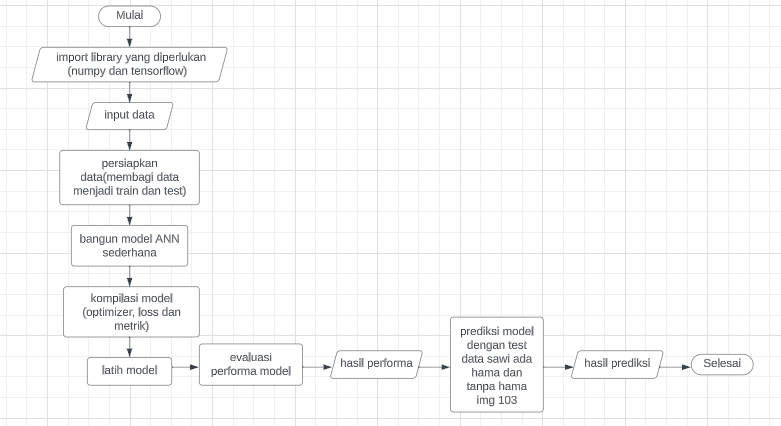

**Pseudocode** \


```
> ANN  <- JUDUL

> MULAI

> import library
numpy
tensorflow

> input -> data

> persiapan data
x_train
y_train
x_test
y_test

> bangun model ANN sederhana

> kompilasi model
optimizar
loss
metrik

> latih model

> evaluasi performa model
> output -> hasil performa

> prediksi model -> test data(ada hama dan tidak ada hama)
> output -> hasil prediksi

> SELESAI
```



**Analisis** \
Pada ANN data test ketika melakukan augmentasi gambar diketahui bahwa terdapat 800 gambar pada data train dan 199 gambar pada data test. Lalu saat melakukan pelatihan pada model nilai epochs sebanyak 5 diketahui bahwa semakin tinggi tetapi hanya sampai iterasi ke-4. Pada iterasi ke-5 nilai akurasinya semakin rendah. Saat melakukan evaluasi performa dari model pada data test didapatkan hasil bahwa akurasinya hanya sebesar 0.58 atau 58%. sesuai dengan nilai epochs pada iterasi ke-5. Saat dilakukan prediksi model prediksi yang dihasilkan terkena hama.

Sedangkan untuk ANN pada data latihan diketahui bahwa nilai epochs akurasi dari iterasi pertama sampai dengan iterasi ke-5 nilainya terus naik sampai menyentuh 91%.
Lalu saat dilakukan evaluasi performa hasil akurasinya sebesar 91%. Saat dilakukan prediksi model prediksi yang dihasilkan tidak terkena hama dan terkena hama.

Pada model ANN data test memang akurasi yang didapatkan besar tetapi prediksi pada modelnya tidak akurat. Bisa dilihat dari gambar yang diberikan harusnya terdapat sawi yang terkena hama dan sawi yang tidak terkena hama.


# B. CNN

## Tahap pertama persiapan data dan library

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

## Hubungkan ke GDrive

In [ ]:
path_with_pest = '/content/drive/MyDrive/SAWI/valid/Data Sawi Ada Hama'
path_without_pest = '/content/drive/MyDrive/SAWI/valid/Data Sawi Tanpa Hama'

In [ ]:
#load data file
pest_files = os.listdir(path_with_pest)
print(pest_files[0:5])
print(pest_files[-5:])

nopest_files = os.listdir(path_without_pest)
print(nopest_files[0:5])
print(nopest_files[0:5])

print(f'Number of with pest images:{len(pest_files)}')
print(f'Number of without pest image:{len(nopest_files)}')

['13.png', '12.png', '117.png', '10.png', '101.png']
['153.png', '164.png', '155.png', '18.png', '181.png']
['102.png', '114.png', '104.png', '128.png', '127.png']
['102.png', '114.png', '104.png', '128.png', '127.png']
Number of with pest images:99
Number of without pest image:100


## Membuat label pada data

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
99
100
199
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


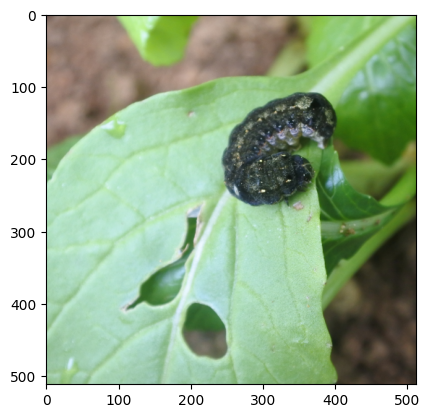

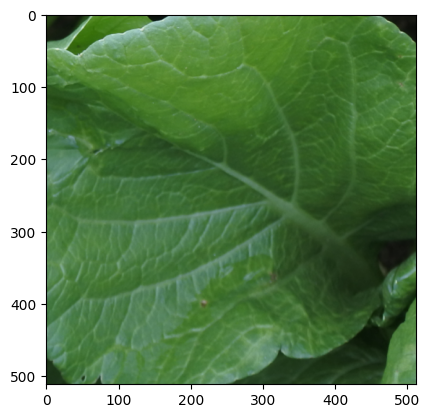

In [ ]:
pest_files = [1]*len(pest_files)
nopest_files = [0]*len(nopest_files)
print(pest_files[0:5]), print(nopest_files[0:5])
print(len(pest_files)), print(len(nopest_files))

labels = pest_files + nopest_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

#display with pest image
img = mpimg.imread(path_with_pest + '/12.png')
imgplot = plt.imshow(img)
plt.show()


#displaying without pest image
img = mpimg.imread(path_without_pest + '/12.png')
imgplot = plt.imshow(img)
plt.show()

## Pemrosesan Data

In [ ]:
data = []

pest_files = os.listdir(path_with_pest)

for img_file in pest_files:
  image = Image.open(path_with_pest + '/' + str(img_file))
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
nopest_files = os.listdir(path_without_pest)

for img_file in nopest_files:
  image = Image.open(path_without_pest + '/' + str(img_file))
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

type(data), len(data)

data[0]

array([[[145, 189, 137],
        [143, 187, 134],
        [141, 187, 131],
        ...,
        [185, 230, 210],
        [187, 231, 211],
        [194, 234, 218]],

       [[144, 188, 135],
        [141, 185, 130],
        [143, 189, 138],
        ...,
        [187, 231, 210],
        [189, 232, 213],
        [193, 234, 216]],

       [[142, 187, 133],
        [140, 184, 130],
        [142, 189, 136],
        ...,
        [193, 235, 218],
        [196, 237, 221],
        [197, 237, 223]],

       ...,

       [[ 96, 155,  71],
        [114, 170, 106],
        [142, 189, 149],
        ...,
        [158, 137, 121],
        [166, 144, 130],
        [168, 148, 132]],

       [[119, 172, 125],
        [150, 194, 169],
        [164, 203, 184],
        ...,
        [156, 133, 119],
        [160, 138, 124],
        [158, 139, 123]],

       [[158, 202, 186],
        [177, 213, 208],
        [163, 202, 181],
        ...,
        [152, 129, 116],
        [156, 134, 121],
        [153, 133, 118]]

In [ ]:
# converting image list and label list to numpy array
x = np.array(data)
y = np.array(labels)

## Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x.shape, x_train.shape, x_test.shape)

x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0], x_train_scaled[0]

(199, 128, 128, 3) (159, 128, 128, 3) (40, 128, 128, 3)


(array([[[ 16,  21,  15],
         [ 14,  19,  13],
         [ 14,  20,  13],
         ...,
         [173, 212, 185],
         [172, 210, 185],
         [170, 208, 183]],
 
        [[ 19,  24,  18],
         [ 17,  23,  17],
         [ 16,  23,  18],
         ...,
         [172, 209, 185],
         [172, 210, 185],
         [173, 210, 186]],
 
        [[ 24,  29,  23],
         [ 24,  29,  24],
         [ 17,  24,  21],
         ...,
         [168, 207, 184],
         [170, 210, 186],
         [172, 211, 188]],
 
        ...,
 
        [[152, 192, 188],
         [149, 189, 187],
         [146, 186, 185],
         ...,
         [137, 178, 163],
         [142, 183, 168],
         [146, 187, 171]],
 
        [[154, 193, 190],
         [156, 194, 193],
         [153, 193, 192],
         ...,
         [137, 177, 162],
         [142, 181, 164],
         [146, 185, 167]],
 
        [[157, 196, 194],
         [157, 196, 195],
         [155, 194, 193],
         ...,
         [142, 181, 164],
  

## CNN

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

#compile the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

#training the neural network
history = model.fit(x_train_scaled, y_train, validation_split = 0.1, epochs = 15)

Epoch 1/15
5/5 [==============================] - 3s 126ms/step - loss: 1.1856 - acc: 0.4615 - val_loss: 0.6969 - val_acc: 0.3750
Epoch 2/15
5/5 [==============================] - 0s 24ms/step - loss: 0.7226 - acc: 0.5035 - val_loss: 0.6907 - val_acc: 0.6250
Epoch 3/15
5/5 [==============================] - 0s 23ms/step - loss: 0.6971 - acc: 0.4266 - val_loss: 0.6939 - val_acc: 0.3750
Epoch 4/15
5/5 [==============================] - 0s 24ms/step - loss: 0.6868 - acc: 0.6014 - val_loss: 0.7293 - val_acc: 0.3750
Epoch 5/15
5/5 [==============================] - 0s 26ms/step - loss: 0.6963 - acc: 0.5385 - val_loss: 0.6987 - val_acc: 0.3750
Epoch 6/15
5/5 [==============================] - 0s 22ms/step - loss: 0.6798 - acc: 0.6224 - val_loss: 0.6767 - val_acc: 0.6250
Epoch 7/15
5/5 [==============================] - 0s 23ms/step - loss: 0.6483 - acc: 0.6643 - val_loss: 0.6572 - val_acc: 0.7500
Epoch 8/15
5/5 [==============================] - 0s 24ms/step - loss: 0.5919 - acc: 0.6923 - va

## Model evaluasi

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

2/2 [==============================] - 0s 77ms/step - loss: 0.4737 - acc: 0.8000
Test Accuracy =  0.800000011920929


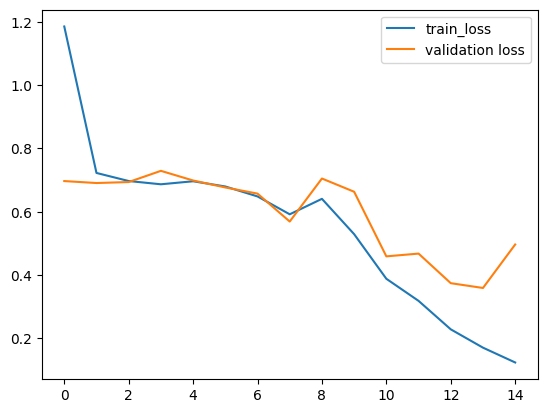

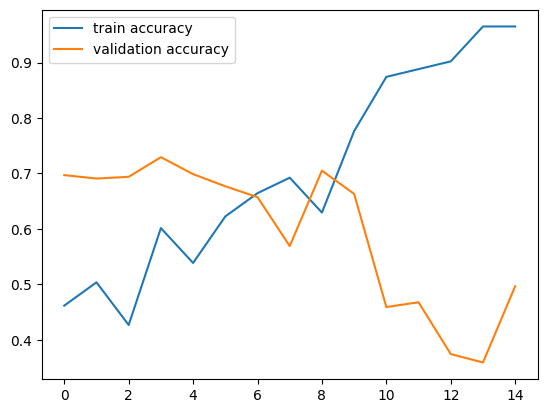

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_loss'], label = 'validation accuracy')
plt.legend()
plt.show()

## Sistem prediksi

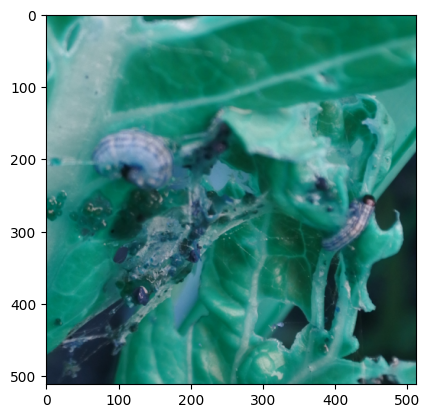

1/1 [==============================] - 0s 137ms/step
[[0.66664857 0.9706609 ]]
1
The leaves in the pictures are affected by pests


In [ ]:
input_image_path = path_with_pest + '/1.png'
input_image = cv2.imread(input_image_path)

imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The leaves in the pictures are affected by pests')
else:
  print('The leaves in the pictures are not affected by pests')

## Test akurasi model

In [ ]:
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (128, 128, 3), trainable = False)

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape = (128, 128, 3)),
  tf.keras.layers.Lambda(lambda x : tf.image.resize(x, (224, 224))),
  pretrained_model,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_7 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs = 15)

Epoch 1/15
5/5 [==============================] - 5s 169ms/step - loss: 0.8025 - acc: 0.4403
Epoch 2/15
5/5 [==============================] - 0s 42ms/step - loss: 0.3903 - acc: 0.8616
Epoch 3/15
5/5 [==============================] - 0s 41ms/step - loss: 0.2278 - acc: 0.9308
Epoch 4/15
5/5 [==============================] - 0s 40ms/step - loss: 0.1476 - acc: 0.9560
Epoch 5/15
5/5 [==============================] - 0s 40ms/step - loss: 0.1080 - acc: 0.9811
Epoch 6/15
5/5 [==============================] - 0s 39ms/step - loss: 0.0834 - acc: 0.9874
Epoch 7/15
5/5 [==============================] - 0s 40ms/step - loss: 0.0679 - acc: 0.9937
Epoch 8/15
5/5 [==============================] - 0s 40ms/step - loss: 0.0555 - acc: 1.0000
Epoch 9/15
5/5 [==============================] - 0s 40ms/step - loss: 0.0465 - acc: 1.0000
Epoch 10/15
5/5 [==============================] - 0s 40ms/step - loss: 0.0399 - acc: 1.0000
Epoch 11/15
5/5 [==============================] - 0s 41ms/step - loss: 0.0351

## Skor akurasi

In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}')

2/2 [==============================] - 1s 443ms/step - loss: 0.0629 - acc: 0.9750
Test Loss = 0.06288833916187286
Test Accuracy = 0.9750000238418579


# **Latihan :**
- Buatlah sebuah model CNN dengan studi kasus gambar sayur sawi dengan database “data Latihan”
https://drive.google.com/drive/folders/11ZbhPyFGk7aosX0
G_ariVXBfB2VGCGi7?usp=sharing. Analisis data antara
data yang ada dimodul dengan data Latihan.
- Buatlah flowchart dan Pseudocode untuk model diatas.

## Jawaban Latihan

Hubungkan ke GDrive

In [ ]:
path_with_pest = '/content/drive/MyDrive/SAWI/train/Data Sawi Ada Hama'
path_without_pest = '/content/drive/MyDrive/SAWI/train/Data Sawi Tanpa Hama'

In [ ]:
#load data file
pest_files = os.listdir(path_with_pest)
print(pest_files[0:5])
print(pest_files[-5:])

nopest_files = os.listdir(path_without_pest)
print(nopest_files[0:5])
print(nopest_files[0:5])

print(f'Number of with pest images:{len(pest_files)}')
print(f'Number of without pest image:{len(nopest_files)}')

['192.png', '190.png', '19.png', '191.png', '234.png']
['84.png', '55.png', '85.png', '96.png', '68.png']
['193.png', '195.png', '19.png', '191.png', '190.png']
['193.png', '195.png', '19.png', '191.png', '190.png']
Number of with pest images:400
Number of without pest image:400


Membuat label pada data

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
400
400
800
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


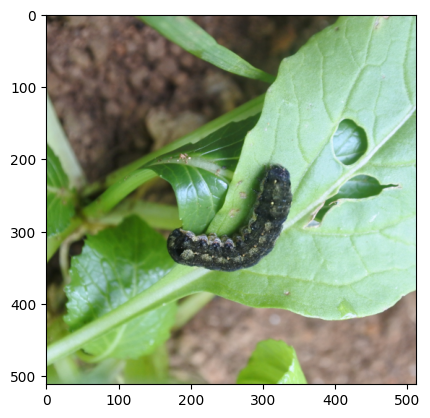

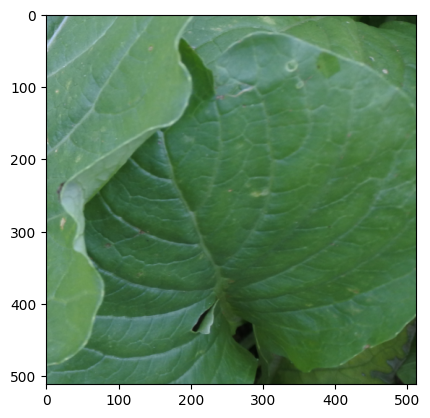

In [ ]:
pest_files = [1]*len(pest_files)
nopest_files = [0]*len(nopest_files)
print(pest_files[0:5]), print(nopest_files[0:5])
print(len(pest_files)), print(len(nopest_files))

labels = pest_files + nopest_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

#display with pest image
img = mpimg.imread(path_with_pest + '/20.png')
imgplot = plt.imshow(img)
plt.show()


#displaying without pest image
img = mpimg.imread(path_without_pest + '/20.png')
imgplot = plt.imshow(img)
plt.show()

Pemrosesan Data

In [ ]:
data = []

pest_files = os.listdir(path_with_pest)

for img_file in pest_files:
  image = Image.open(path_with_pest + '/' + str(img_file))
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
nopest_files = os.listdir(path_without_pest)

for img_file in nopest_files:
  image = Image.open(path_without_pest + '/' + str(img_file))
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

type(data), len(data)

data[0]

array([[[102, 143,  72],
        [107, 147,  83],
        [112, 151,  94],
        ...,
        [121, 160, 116],
        [121, 159, 113],
        [127, 164, 120]],

       [[ 99, 140,  58],
        [ 98, 140,  59],
        [100, 142,  70],
        ...,
        [121, 159, 113],
        [120, 158, 109],
        [128, 165, 119]],

       [[115, 147,  85],
        [112, 145,  76],
        [106, 143,  71],
        ...,
        [120, 158, 106],
        [124, 160, 109],
        [137, 171, 123]],

       ...,

       [[ 92, 137,  68],
        [ 95, 138,  69],
        [104, 144,  79],
        ...,
        [177, 200, 204],
        [169, 194, 196],
        [175, 200, 206]],

       [[ 91, 135,  62],
        [ 95, 138,  69],
        [104, 143,  82],
        ...,
        [158, 185, 178],
        [160, 188, 184],
        [163, 190, 195]],

       [[103, 141,  81],
        [111, 147,  96],
        [122, 154, 116],
        ...,
        [118, 155, 120],
        [116, 155, 117],
        [112, 150, 113]]

In [ ]:
#converting image list and label list to numpy array
x = np.array(data)
y = np.array(labels)

Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x.shape, x_train.shape, x_test.shape)

x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0], x_train_scaled[0]

(800, 128, 128, 3) (640, 128, 128, 3) (160, 128, 128, 3)


(array([[[111, 153,  67],
         [111, 153,  67],
         [110, 152,  67],
         ...,
         [144, 184,  95],
         [144, 184,  95],
         [140, 181,  89]],
 
        [[110, 153,  67],
         [108, 151,  65],
         [105, 149,  64],
         ...,
         [142, 182,  95],
         [144, 184,  96],
         [140, 180,  90]],
 
        [[106, 151,  63],
         [104, 149,  63],
         [105, 148,  65],
         ...,
         [146, 185, 101],
         [146, 185, 103],
         [143, 182,  97]],
 
        ...,
 
        [[130, 173,  91],
         [130, 173,  91],
         [129, 172,  90],
         ...,
         [158, 193, 109],
         [156, 191, 107],
         [149, 186,  99]],
 
        [[130, 173,  91],
         [130, 173,  91],
         [130, 173,  91],
         ...,
         [157, 192, 107],
         [154, 189, 103],
         [150, 186,  98]],
 
        [[129, 173,  89],
         [130, 174,  91],
         [131, 174,  92],
         ...,
         [156, 192, 105],
  

CNN

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

#compile the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

#training the neural network
history = model.fit(x_train_scaled, y_train, validation_split = 0.1, epochs = 15)

Epoch 1/15
18/18 [==============================] - 2s 31ms/step - loss: 0.6620 - acc: 0.6806 - val_loss: 0.6477 - val_acc: 0.6875
Epoch 2/15
18/18 [==============================] - 0s 20ms/step - loss: 0.4632 - acc: 0.7778 - val_loss: 0.6428 - val_acc: 0.6875
Epoch 3/15
18/18 [==============================] - 0s 19ms/step - loss: 0.4456 - acc: 0.8142 - val_loss: 0.4619 - val_acc: 0.7656
Epoch 4/15
18/18 [==============================] - 0s 18ms/step - loss: 0.3892 - acc: 0.8385 - val_loss: 0.4160 - val_acc: 0.7969
Epoch 5/15
18/18 [==============================] - 0s 18ms/step - loss: 0.3105 - acc: 0.8785 - val_loss: 0.5143 - val_acc: 0.7500
Epoch 6/15
18/18 [==============================] - 0s 19ms/step - loss: 0.3360 - acc: 0.8490 - val_loss: 0.3414 - val_acc: 0.7969
Epoch 7/15
18/18 [==============================] - 0s 20ms/step - loss: 0.2693 - acc: 0.8872 - val_loss: 0.2744 - val_acc: 0.8750
Epoch 8/15
18/18 [==============================] - 0s 19ms/step - loss: 0.2625 - a

Model evaluasi

In [ ]:
loss, accuracy = model.evaluate(x_train_scaled, y_train)
print('Test Accuracy = ', accuracy)

20/20 [==============================] - 0s 10ms/step - loss: 0.0823 - acc: 0.9781
Test Accuracy =  0.9781249761581421


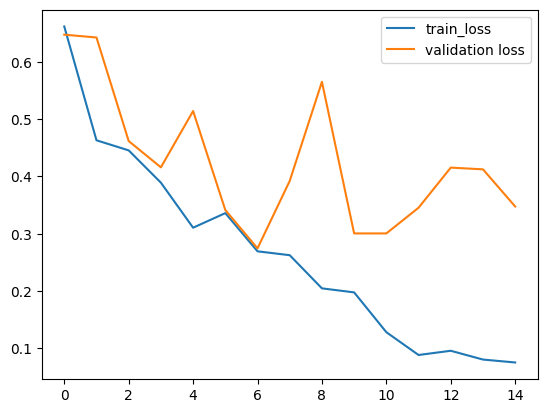

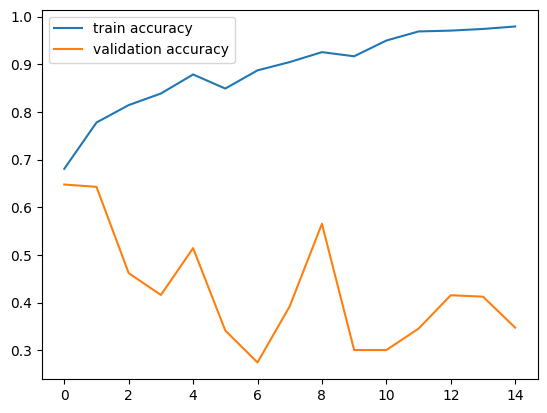

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_loss'], label = 'validation accuracy')
plt.legend()
plt.show()

Sistem prediksi

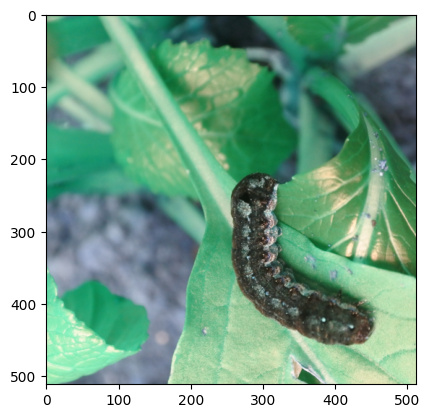

1/1 [==============================] - 0s 115ms/step
[[9.9994886e-01 1.4530674e-04]]
0
The leaves in the pictures are not affected by pests


In [ ]:
input_image_path = path_with_pest + '/21.png'
input_image = cv2.imread(input_image_path)

imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The leaves in the pictures are affected by pests')
else:
  print('The leaves in the pictures are not affected by pests')

Test akurasi model

In [ ]:
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (128, 128, 3), trainable = False)

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape = (128, 128, 3)),
  tf.keras.layers.Lambda(lambda x : tf.image.resize(x, (224, 224))),
  pretrained_model,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_11 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs = 15)

Epoch 1/15
20/20 [==============================] - 4s 39ms/step - loss: 0.4279 - acc: 0.7859
Epoch 2/15
20/20 [==============================] - 1s 37ms/step - loss: 0.1182 - acc: 0.9672
Epoch 3/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0824 - acc: 0.9766
Epoch 4/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0610 - acc: 0.9875
Epoch 5/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0489 - acc: 0.9922
Epoch 6/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0407 - acc: 0.9937
Epoch 7/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0357 - acc: 0.9953
Epoch 8/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0310 - acc: 0.9969
Epoch 9/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0265 - acc: 0.9953
Epoch 10/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0230 - acc: 0.9984
Epoch 11/15
20/20 [==============================] - 1s 39m

Skor akurasi

In [ ]:
score, acc = model.evaluate(x_train_scaled, y_train)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}')

20/20 [==============================] - 2s 47ms/step - loss: 0.0130 - acc: 1.0000
Test Loss = 0.012990017421543598
Test Accuracy = 1.0


**Flowchart** \
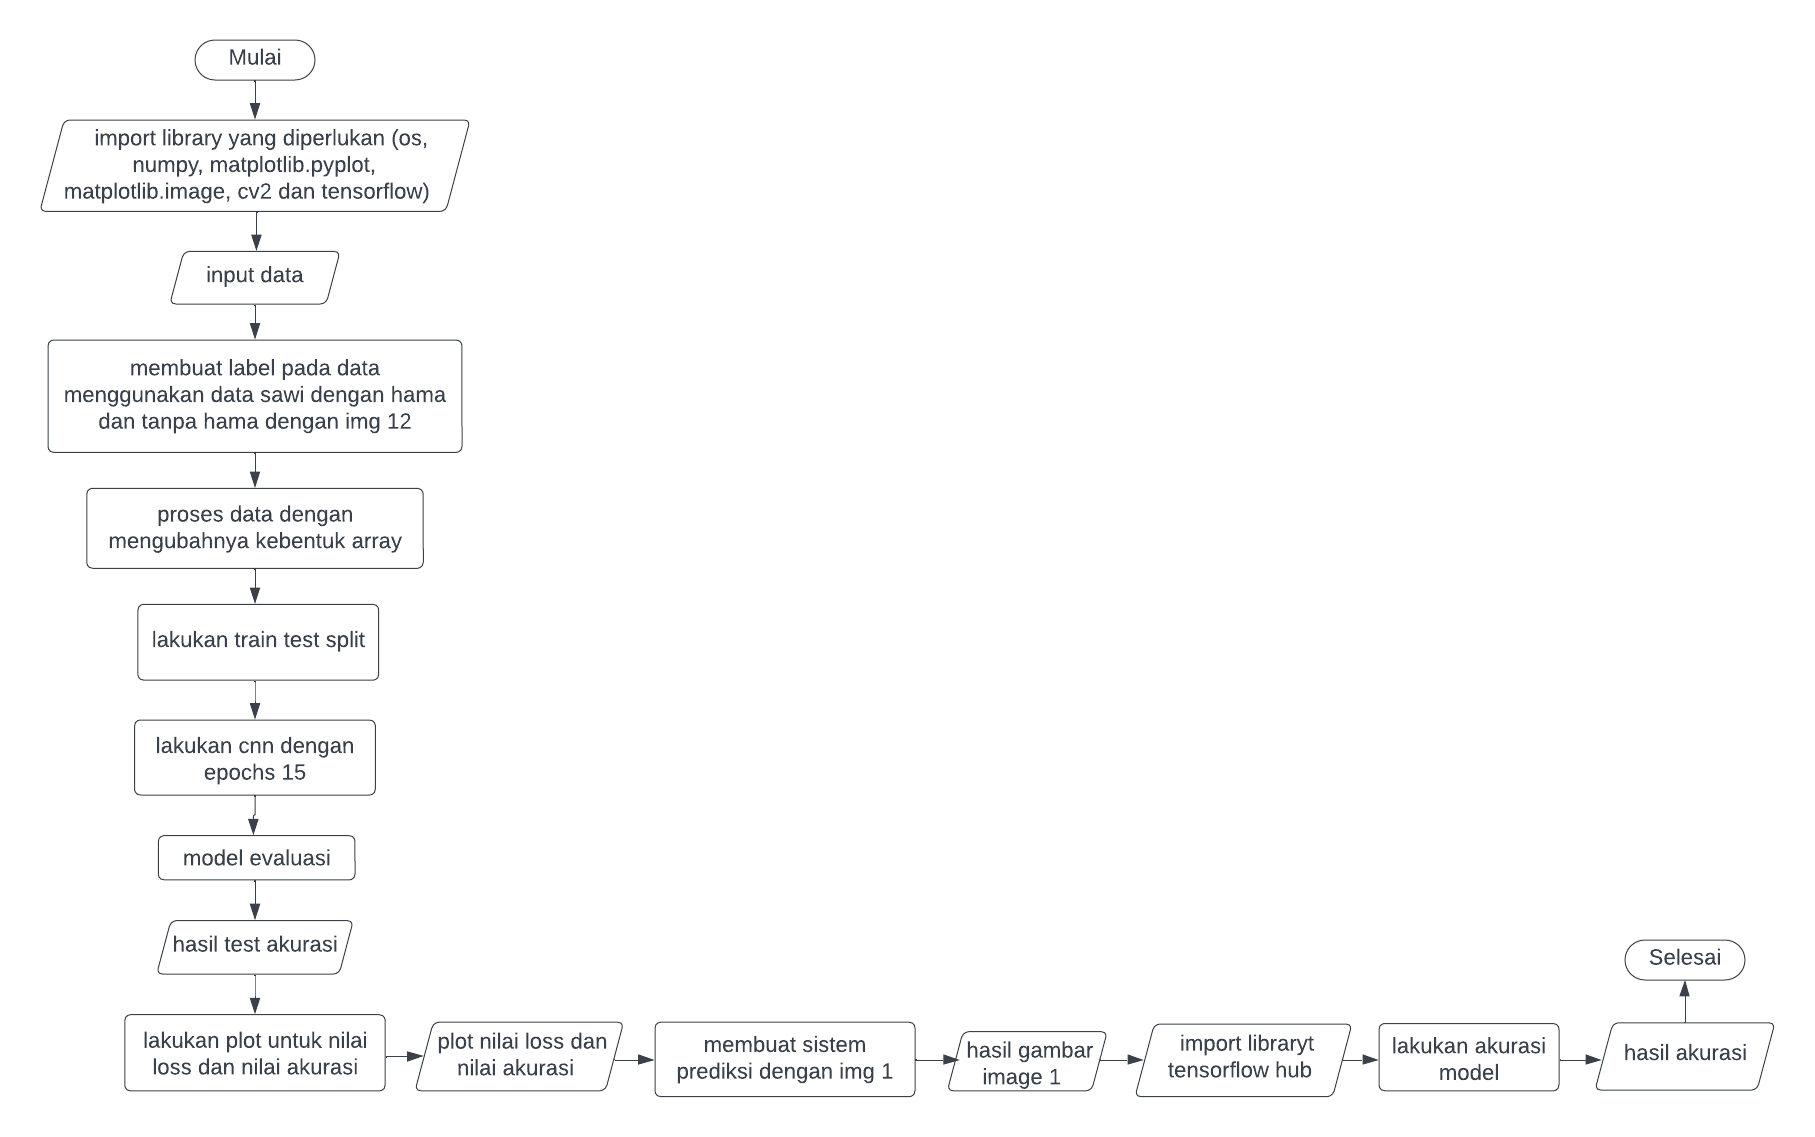

**Pseudocode** \


```
> CNN  <- JUDUL

> MULAI

> import library
os
numpy
matplotlib.pyplot
matplotlib.image
cv2
tensorflow

> input -> data

> label data -> data sawi ada hama dan data sawi tidak ada hama pada img 12

> proses data -> menjadi array

> train test split

> cnn dengan epochs 15

> model evaluasi
> output -> hasil test akurasi

> plot -> nilai loss dan nilai akurasi
> output -> grafik nilai loss dan nilai akurasi

> sistem prediksi -> img 1
> output -> hasil img 1

> import library -> tensorflow hub

> akurasi model
> output -> hasil akurasi

> SELESAI
```



**Analisis** \
Setelah dilakukan import data dan persiapan data, disini data yang digunakan adalah data valid dimana terdapat dua data yaitu data sawi ada hama dan tanpa hama. Saat dilakukan load data diketahui bahwa terdapat 99 gambar sawi dengan
hama dan 100 gambar sawi tanpa hama. Lalu dibuat label pada data, dimana datanya menggunakan gambar 12. Hasil gambar yang diberikan sesuai dengan gambar yang terdapat pada data. \
Saat dilakukan pemrosesan data, data diubah menjadi bentuk array. Setelah dilakukan pemrosesan data, data dibagi menjadi data test dan data train. Selanjutnya lakukan iterasi sebanyak 15 kali. Hasil yang diberikan semakin tinggi. Pada iterasi ke-15 didapatkan hasil 75%. Namun saat dilakukan model evaluasi, nilai yang didapatkan akurasinya adalah 80%. \
Lalu dari hasil plot pada train loss dan validation loss didapatkan hasil bahwa
nilai train loss semakin menurun dan pada validation loss datanya sempat menurun
tetapi terdapat kenaikan. Ini bisa jadi menunjukkan bahwa terjadi overfitting pada data. Hal ini semakin diperkuat saat nilai train akurasi menaik sedangkan validasi akurasinya menurun yang menandakan adanya overfitting pada data. Namun pada sistem prediksi, model tetap mengenali bahwa gambar merupakan gambar sawi dengan hama. Lalu saat dilakukan pemodelan dengan epochs sebanya 15, hasil dari iterasi menunjukkan bahwa semakin tinggi hasil akurasinya sampai 100%. Lalu hasil dari akurasi didapatkan senilai 97%. Namun dari hasil keseluruhan model ini mengalami overfitting.

Selanjutnya pada data latih terdapat 2 data yaitu sawi dengan hama dan tanpa hama. Diketahui bahwa jumlah gambar dari kedua data terdapat 400 data. Lalu dilakukan label pada data yang selanjutnya ditunjukkan oleh gambar 20. Selanjutnya dilakukan pemrosesan data yang mengubah menjadi data array. Lalu dilakukan test split dengan membagi menjadi data test dan data train. Saat dilakukan CNN pada model dengan iterasi sebanyak 15, iterasi menghasilkan nilai naik turun dan berhenti pada nilai 87%. \
Pada model evaluasi didapatkan hasil 97%. Hasil pada train loss dan validation loss mengalami penurunan dua-duanya. Yang berarti bahwa model berjalan dengan baik. Namun, pada hasil train akurasi dan vvalidasi akurasi didapatkan bahwa nilai train menaik yang berarti bahwa terdapat overfitting pada model. Lalu saat dilakukan sistem prediksi dari gambar 21, gambar tersebut menunjukkan ada hama tetapi hasil dari prediksinya menunjukkan bahwa tidak ada hama. Dengan akurasi yang menaik hingga 100% dan model tidak berjalan dengan baik menandakan bahwa terjadi overfitting pada data.

Pada data test dan data train ini keduanya menunjukkan terjadinya overfitting pada model. Kemungkinan besar hal ini terjadi dikarenakan terdapat kesalahan pada kode yang dibuat.